/home/fsmiguel/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


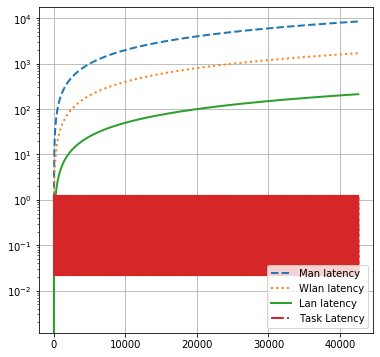

In [10]:
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
pd.options.display.max_rows=10
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import xgboost
import graphviz
import matplotlib.dates as md
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#import MyAnalysis 
rcParams['figure.figsize'] = 6,6

#Import for threading

import random
import sys
from threading import Thread, RLock
import time

import numpy as np

#For tasks
dfTask = pd.read_table("/home/fsmiguel/Documents/trace/Task.csv",sep = ',',header = 0)
#print(df)
XTasks=dfTask['NumberOfTasks']
Y1Tasks=dfTask['NumberOfLocalTask']
Y2Tasks=dfTask['NumberOfAwayTaskDueToPosition']

#For Latency
dfLatency = pd.read_table("/home/fsmiguel/Documents/trace/Latency.csv",sep = ',',header = 0)
taskDelay=dfLatency['taskDelay']
wanDelay=dfLatency['wanDelay']
manDelay=dfLatency['manDelay']
wlanDelay=dfLatency['wlanDelay']
lanDelay=dfLatency['lanDelay']


def simpleTaskCurve(X,Y1,Y2):
    plt.plot(X, Y1,label="Task Computed locally",linestyle="--",lw=2)
    plt.plot(X, Y2,label="Task Computed Away",linestyle=":",lw=2)
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    plt.fill_between(X, Y1, Y2, color='y', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    #plt.xlabel('Number of Tasks generated')
    #plt.ylabel('Number of tasks processed locally')
    plt.grid(True)
    plt.savefig("TaskGeneratedVSTaskProcessed100AVs.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.clf()
    
def simpleLatencyCurve(taskDelay,wanDelay,manDelay,wlanDelay,lanDelay):
    plt.plot(wanDelay, manDelay,label="Man latency",linestyle="--",lw=2)
    plt.plot(wanDelay, wlanDelay,label="Wlan latency",linestyle=":",lw=2)
    plt.plot(wanDelay, lanDelay,label="Lan latency",linestyle="-",lw=2)
    plt.plot(wanDelay, taskDelay,label="Task Latency",linestyle="-.",lw=2)
    plt.yscale('log')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    #plt.fill_between(X, Y1, Y2, color='y', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    #plt.xlabel('Number of Tasks generated')
    #plt.ylabel('Number of tasks processed locally')
    plt.grid(True)
    #plt.savefig("TaskGeneratedVSTaskProcessed100AVs.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.clf()


def histogramme(X,Y1,Y2):
    n_bins = 5
    fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
    axs.hist(X, bins = n_bins,label="Task Computed locally", alpha=.1)
    axs.hist(Y1, bins = n_bins,label="Task Computed locally", alpha=.8)
    axs.hist(Y2, bins = n_bins,label="Task Computed Away", alpha=.3)
    plt.legend()
    plt.show()
    

#histogramme(X,Y1,Y2)
#simpleTaskCurve(XTasks,Y1Tasks,Y2Tasks)
simpleLatencyCurve(taskDelay,wanDelay,manDelay,wlanDelay,lanDelay)